In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/clean_seville_2018.csv')
df_non_shared = df[df['Tipo_Inmueble'] != 'Habitacion_Compartida']
df.head()

,Key,Fecha_Encuentro,Host_Key,Tipo_Inmueble,Dormitorios,Capacidad,Min_Nights,Precio,Distrito,Barrio,Precio/Capacidad
0,17619712,2017-08-14,996454,Habitacion_Privada,3.0,6.0,1.0,75.0,San_Pablo_Santa_Justa,Las_Huertas,12.500000
1,25001601,2018-05-25,22814168,Inmueble_Completo,2.0,3.0,2.0,50.0,San_Pablo_Santa_Justa,Las_Huertas,16.666667
2,12066401,2017-08-14,64642311,Inmueble_Completo,1.0,4.0,1.0,50.0,San_Pablo_Santa_Justa,Las_Huertas,12.500000
3,19201324,2017-08-14,102310846,Habitacion_Privada,0.0,2.0,2.0,42.0,San_Pablo_Santa_Justa,Las_Huertas,21.000000
4,6927562,2017-08-14,36316483,Inmueble_Completo,3.0,4.0,2.0,45.0,San_Pablo_Santa_Justa,San_Jose_Obrero,11.250000


Estadísticas sobre el precio del alquiler turístico según distritos de Sevilla

In [3]:
media_precio = df_non_shared['Precio'].mean()

Text(68.82474614516735, 11.3, 'Media')

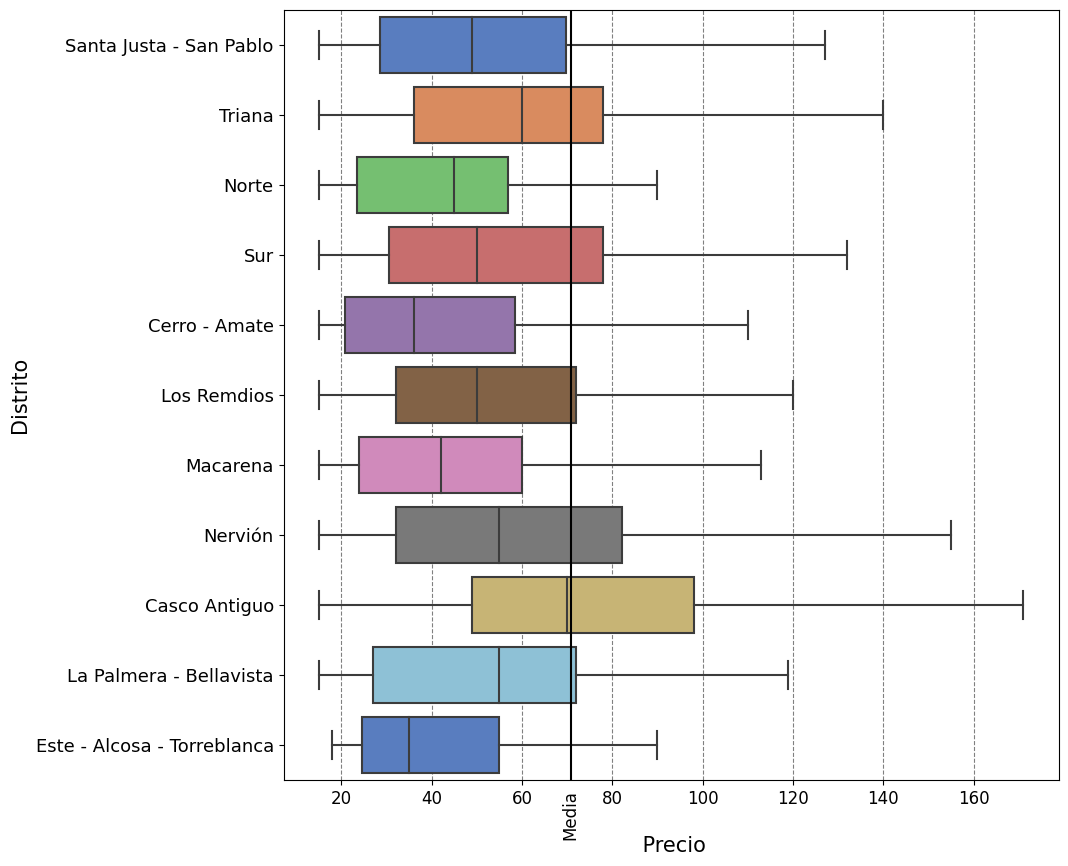

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

ax
sns.boxplot(data = df_non_shared, 
            x = 'Precio', 
            y = 'Distrito',
            palette = 'muted',
            showfliers = False)
ax.plot(np.array([media_precio,media_precio]),
                 ax.get_ylim(),
                 color = (0,0,0))

ax.set_yticklabels(['Santa Justa - San Pablo','Triana','Norte','Sur','Cerro - Amate', 
                    'Los Remdios', 'Macarena', 'Nervión','Casco Antiguo', 'La Palmera - Bellavista', 'Este - Alcosa - Torreblanca'],
                    fontdict = {'fontsize' : 13})
plt.xticks(fontsize = 12)
ax.set_ylabel('Distrito', fontdict={'fontsize': 15})
ax.set_xlabel('\n Precio',fontdict={'fontsize':15})
ax.text(x = media_precio -2, y = ax.get_ylim()[0] + 0.8, s = 'Media', fontdict={'rotation':90,'fontsize':12})

Densidad de los anuncios de alquiler turístico según distritos de Sevilla

([<matplotlib.patches.Wedge at 0x29ec7c64790>,
 [Text(-0.2838679480619106, 1.0627412611087992, 'Casco_Antiguo'),
  Text(-0.716161577827264, -0.8349326885707398, 'Triana'),
  Text(-0.1725890072275038, -1.0863761018101534, 'Macarena'),
  Text(0.2751117458185712, -1.06504156130766, 'Nervion'),
  Text(0.6046598051578694, -0.9189050658400177, 'Sur'),
  Text(0.8195903884228413, -0.733669949776394, 'Los_Remedios'),
  Text(0.9648827642315383, -0.5282056903223459, 'San_Pablo_Santa_Justa'),
  Text(1.0454403787117463, -0.34213215949255715, 'Bellavista_La_Palmera'),
  Text(1.0810741564652409, -0.2031715241439316, 'Cerro_Amate'),
  Text(1.0942502245809236, -0.11232295404145237, 'Norte'),
  Text(1.0994039657941959, -0.03620662917194627, 'Este_Alcosa_Torreblanca')],
 [Text(-0.15483706257922394, 0.5796770515138904, '58.31%'),
  Text(-0.3906335879057803, -0.4554178301294944, '10.82%'),
  Text(-0.09413945848772935, -0.5925687828055382, '6.74%'),
  Text(0.15006095226467517, -0.580931760713269, '6.32%'),


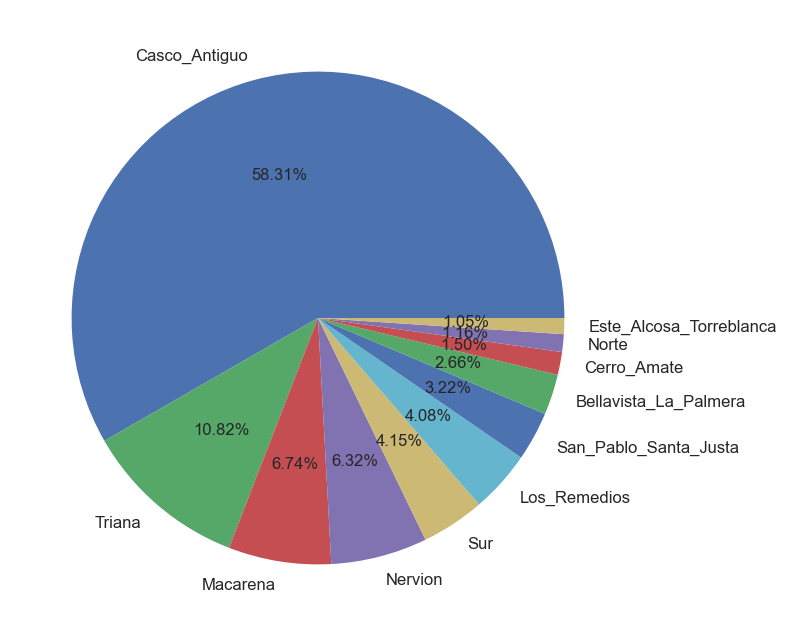

In [49]:
density_data = df['Distrito'].value_counts()

plt.style.use('seaborn-v0_8')

plt.figure(figsize = (8,8))
plt.pie(x = density_data.values, labels = density_data.keys(), autopct='%1.2f%%',
        textprops= {'fontsize': 12})